# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
#Import dependences
import pandas as pd
import json
import matplotlib.pyplot as plt
import random
from citipy import citipy
import numpy as np
import requests
from pprint import pprint
from scipy.stats import linregress
#!pip install sklearn
from sklearn import datasets
#from config import weather_api_key
weather_api_key = '877069c5920cb3ad3f4efa6dac5c6f9e'

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=668a1e1957c0f51366c8b71027d3968716b05e0a403ceb1424ce29c0b01ebfb8
  Stored in directory: c:\users\12254\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


## Generate Cities List

In [52]:
#Step1: Need random latitude and longitude values to feed to citipy

#Create lists and add random latitude and longitude values
long_list = [random_long for random_long in np.random.randint(-180,180,50)]
print(len(long_list))
lat_list = [random_lat for random_lat in np.random.randint(-90,90,50)]
print(len(lat_list))

#Feed random latitude and longitude values to citipy
cities = []
index_max = len(lat_list)
#index_max
for index in range(0,index_max):
    lat_value = lat_list[index]
    #print(lat_value)
    long_value = long_list[index]
    #print(long_value)
    city = citipy.nearest_city(lat_value,long_value)
    city_name = city.city_name
    cities.append(city_name)
print(cities)





50
50
['castro', 'codrington', 'rikitea', 'belushya guba', 'punta arenas', 'airai', 'taolanaro', 'thompson', 'touros', 'namibe', 'vorchdorf', 'busselton', 'hermanus', 'mataura', 'barrow', 'hilo', 'lebu', 'tsihombe', 'dolores hidalgo', 'nome', 'jamestown', 'east london', 'chokurdakh', 'tasiilaq', 'clyde river', 'inta', 'klaksvik', 'hobart', 'basco', 'san patricio', 'provideniya', 'dikson', 'rikitea', 'egvekinot', 'atuona', 'alofi', 'chokurdakh', 'mixtepec', 'kapaa', 'ushuaia', 'bredasdorp', 'cabo san lucas', 'east london', 'ushuaia', 'yenagoa', 'yungkang', 'vaitupu', 'komsomolskiy', 'bargal', 'la ronge']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

lat_list_api = []
long_list_api = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
found_cities = []
all_cities_data = []

base_url = "https://api.openweathermap.org/data/2.5/weather?q="
cities_len = len(cities)
print(cities_len)

50


In [76]:
for city_index in range(0,cities_len):
    city_name = cities[city_index]
    #city_index
    print(f'City number {city_index}, the city of {city_name} is being processed.')
    print('-----------------------------------------------------------------')
    
    try: 
        query_url = f'{base_url}{city_name}&appid={weather_api_key}'
        response = requests.get(query_url).json()
        pprint(response)
    
        #No exception occurs here
        found_cities.append(city_name)
        
        lat = response['coord']['lat']
        lat_list_api.append(lat)

        long = response['coord']['lon']
        long_list_api.append(long)

        max_temp = response['main']['temp_max']
        max_temp_list.append(max_temp)

        humidity = response['main']['humidity']
        humidity_list.append(humidity)

        cloudiness = response['clouds']['all']
        cloudiness_list.append(cloudiness)

        wind_speed = response['wind']['speed']
        wind_speed_list.append(wind_speed)

        country = response['sys']['country']
        country_list.append(country)

        date = response['dt']
        date_list.append(date)
        
        all_cities_data.append({"City": city_name,
                        "Lat": lat,
                        "Long": long,
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date})
    
    except :
        print(f'City {city_name} is not found.')
        print('-----------------------------------------------------------------') 
    
    

City number 0, the city of castro is being processed.
-----------------------------------------------------------------
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -24.7911, 'lon': -50.0119},
 'dt': 1627249381,
 'id': 3466704,
 'main': {'feels_like': 286.2,
          'grnd_level': 906,
          'humidity': 65,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 287.06,
          'temp_max': 287.06,
          'temp_min': 287.06},
 'name': 'Castro',
 'sys': {'country': 'BR', 'sunrise': 1627207218, 'sunset': 1627246352},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 13, 'gust': 2.13, 'speed': 2}}
City number 1, the city of codrington is being processed.
-----------------------------------------------------------------
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': -

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -34.4187, 'lon': 19.2345},
 'dt': 1627249385,
 'id': 3366880,
 'main': {'feels_like': 282.08,
          'grnd_level': 1018,
          'humidity': 53,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 283.6,
          'temp_max': 288.65,
          'temp_min': 283.6},
 'name': 'Hermanus',
 'sys': {'country': 'ZA',
         'id': 2006131,
         'sunrise': 1627191695,
         'sunset': 1627228636,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 34, 'gust': 4.69, 'speed': 4.41}}
City number 13, the city of mataura is being processed.
-----------------------------------------------------------------
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -46.1927, 'lon': 168.8643},
 'dt': 1627249385,
 '

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 70.4692, 'lon': -68.5914},
 'dt': 1627249389,
 'id': 5924351,
 'main': {'feels_like': 272.58,
          'humidity': 100,
          'pressure': 997,
          'temp': 275.28,
          'temp_max': 275.28,
          'temp_min': 275.28},
 'name': 'Clyde River',
 'sys': {'country': 'CA', 'id': 776, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': -14400,
 'visibility': 6437,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 90, 'speed': 2.57}}
City number 25, the city of inta is being processed.
-----------------------------------------------------------------
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.0317, 'lon': 60.1659},
 'dt': 1627249390,
 'id': 1505579,
 'main': {'feels_like': 279.01,
          'grnd_level': 1002,
          'humidity': 95,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 281.32,
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 70.6333, 'lon': 147.9167},
 'dt': 1627249388,
 'id': 2126123,
 'main': {'feels_like': 278.11,
          'grnd_level': 1007,
          'humidity': 57,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 280.91,
          'temp_max': 280.91,
          'temp_min': 280.91},
 'name': 'Chokurdakh',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 94, 'gust': 4.69, 'speed': 4.6}}
City number 37, the city of mixtepec is being processed.
-----------------------------------------------------------------
{'cod': '404', 'message': 'city not found'}
City mixtepec is not found.
-----------------------------------------------------------------
City number 38, the city of kapaa is being processed.
------------------

In [78]:
print(len(found_cities),len(lat_list_api),len(long_list_api))
    

   

50 43 43


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# city_info_dict = {
#     #"City": found_cities,
#     "Lat": lat_list_api,
#     "Long": long_list_api,
#     "Max Temp": max_temp_list,
#     "Humidity": humidity_list,
#     "Cloudiness": cloudiness_list,
#     "Wind Speed": wind_speed_list,
#     "Country": country_list,
#     "Date": date_list
# }

city_info_df = pd.DataFrame(all_cities_data)
city_info_df.head()



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,287.06,65,2,2.00,BR,1627249381
1,codrington,-38.2667,141.9667,283.91,91,87,6.72,AU,1627249248
2,rikitea,-23.1203,-134.9692,294.82,67,19,2.10,PF,1627249382
3,punta arenas,-53.1500,-70.9167,276.21,81,0,6.69,CL,1627249340
4,airai,-8.9266,125.4092,285.82,57,66,1.42,TL,1627249383


In [99]:
city_info_df.to_csv("API_Weather_Data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
humidity_GT_100 = city_info_df.loc[city_info_df['Humidity']>100]

In [81]:
#  Get the indices of cities that have humidity over 100%.
indices = city_info_df.loc[city_info_df['Humidity']>100]
indices

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [82]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

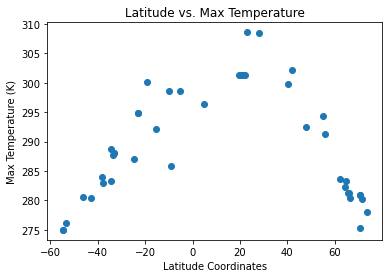

In [83]:
lat_plot = city_info_df['Lat']
temp_plot = city_info_df['Max Temp']
plt.scatter(lat_plot, temp_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Max Temperature (K)")
plt.title("Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

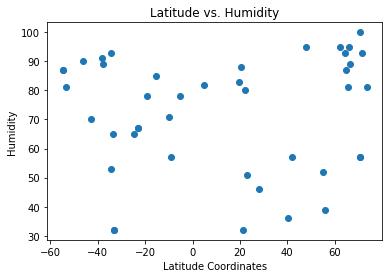

In [84]:
lat_plot = city_info_df['Lat']
humidity_plot = city_info_df['Humidity']
plt.scatter(lat_plot,humidity_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

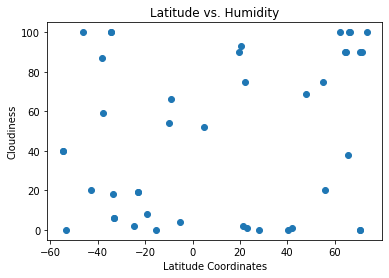

In [85]:
lat_plot = city_info_df['Lat']
cloudiness_plot = city_info_df['Cloudiness']
plt.scatter(lat_plot,cloudiness_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Wind Speed Plot

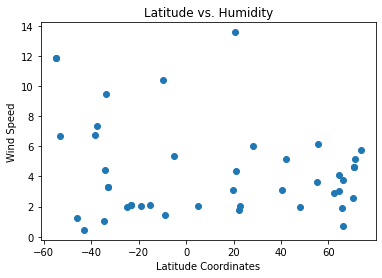

In [86]:
lat_plot = city_info_df['Lat']
wind_speed_plot = city_info_df['Wind Speed']
plt.scatter(lat_plot, wind_speed_plot)
plt.xlabel("Latitude Coordinates")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Humidity")
plt.show()

## Linear Regression

In [87]:
#Northern hemisphere
northern_hempisphere_df = city_info_df.loc[city_info_df['Lat'] > 0]
northern_hempisphere_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,thompson,55.7435,-97.8558,291.24,39,20,6.17,CA,1627249383
8,vorchdorf,48.0039,13.9212,292.46,95,69,1.96,AT,1627249384
12,barrow,71.2906,-156.7887,280.16,93,90,5.14,US,1627249386
13,hilo,19.7297,-155.0900,301.37,83,90,3.09,US,1627249386
15,dolores hidalgo,21.1561,-100.9308,301.36,32,2,4.34,MX,1627249387


In [88]:
#Southern hemisphere
southern_hempisphere_df = city_info_df.loc[city_info_df['Lat'] < 0]
southern_hempisphere_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,287.06,65,2,2.00,BR,1627249381
1,codrington,-38.2667,141.9667,283.91,91,87,6.72,AU,1627249248
2,rikitea,-23.1203,-134.9692,294.82,67,19,2.10,PF,1627249382
3,punta arenas,-53.1500,-70.9167,276.21,81,0,6.69,CL,1627249340
4,airai,-8.9266,125.4092,285.82,57,66,1.42,TL,1627249383


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

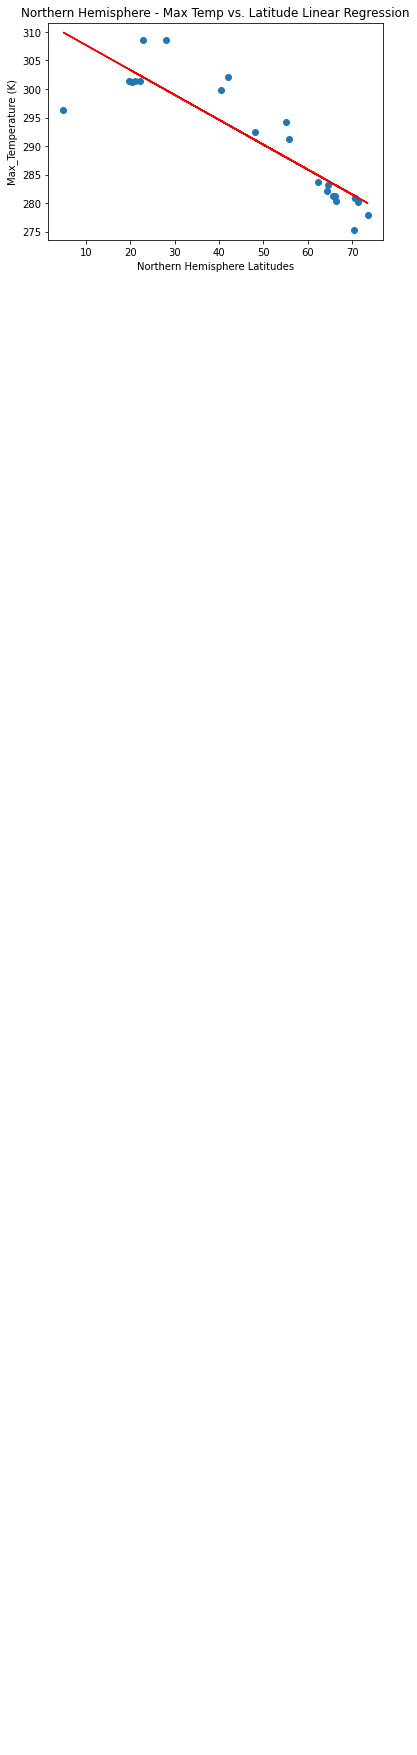

In [89]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Max_Temperature (K)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

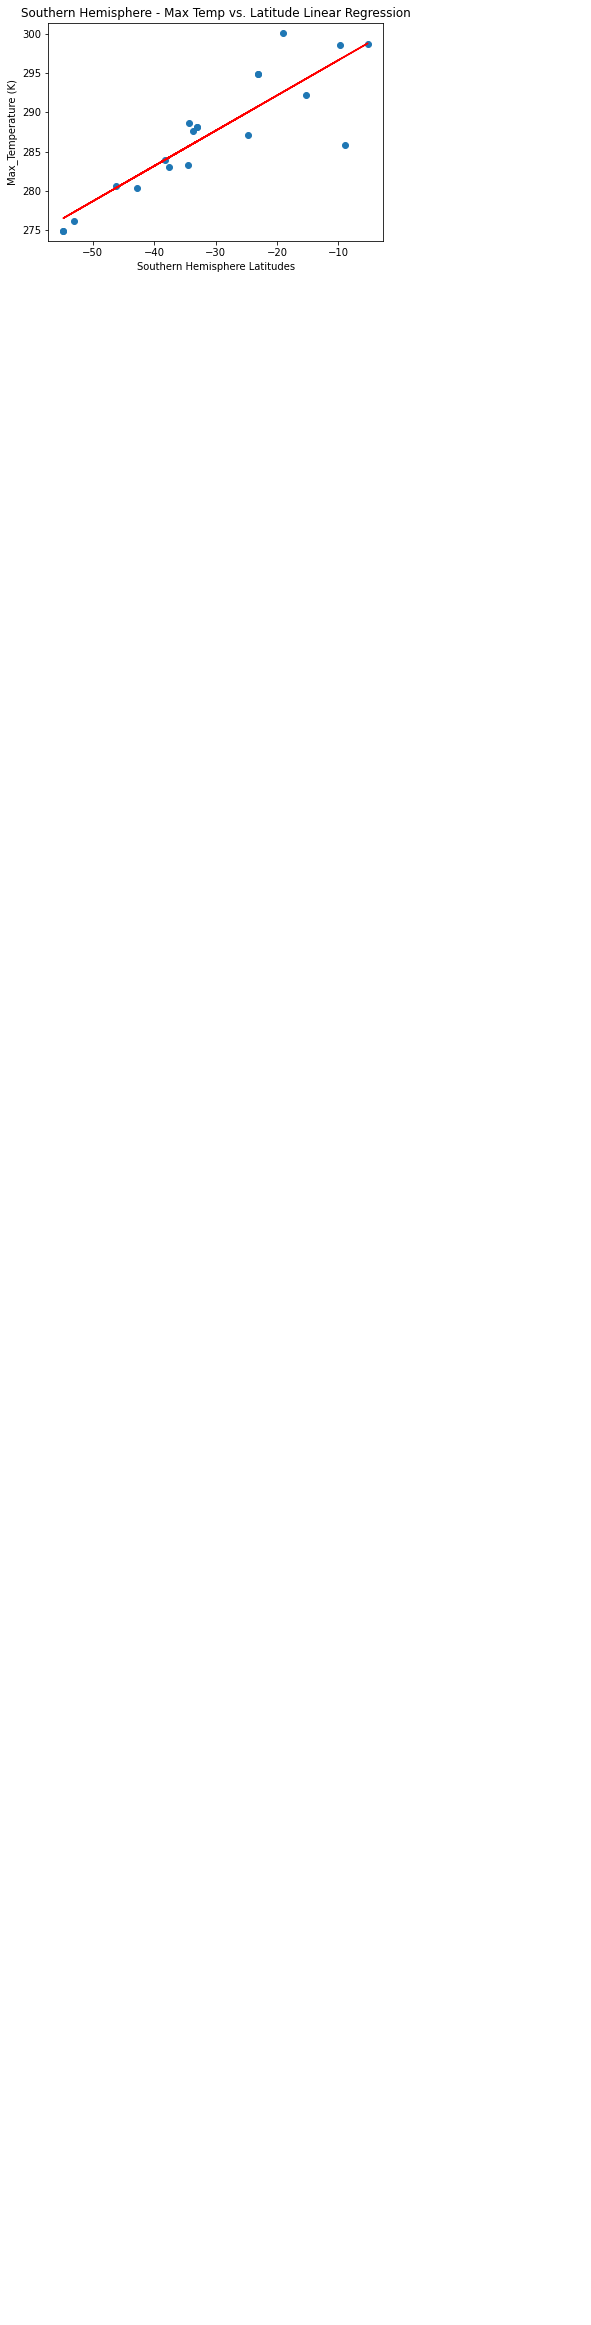

In [90]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Max_Temperature (K)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

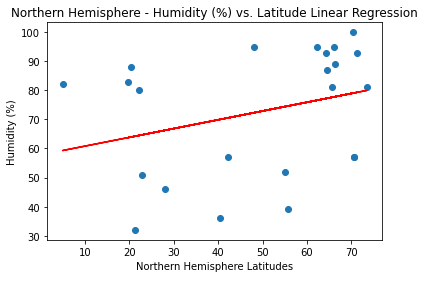

In [91]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

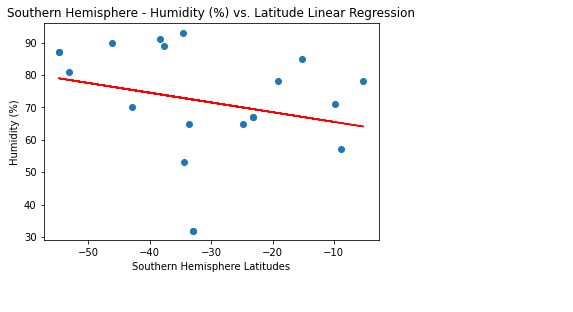

In [92]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

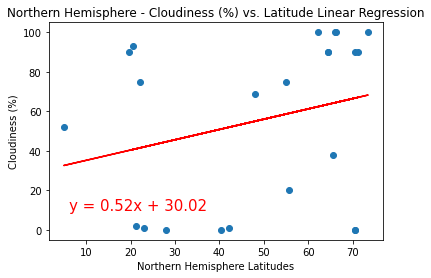

In [93]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

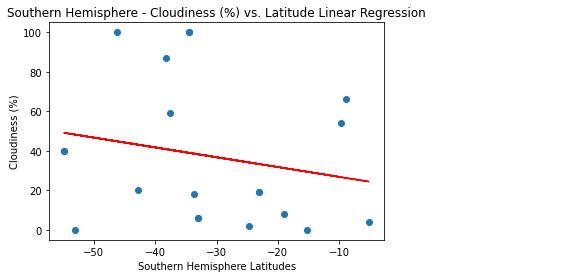

In [94]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

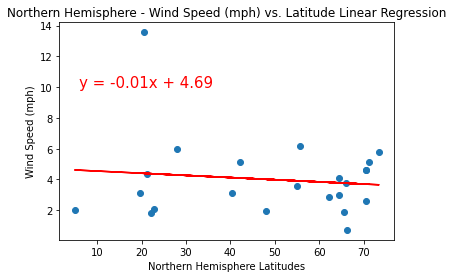

In [95]:
x_values = northern_hempisphere_df['Lat']
y_values = northern_hempisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Northern Hemisphere Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

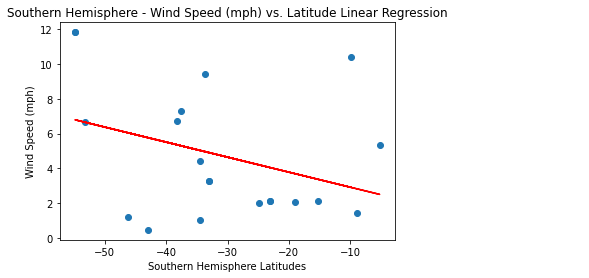

In [96]:
x_values = southern_hempisphere_df['Lat']
y_values = southern_hempisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Southern Hemisphere Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()